In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv('https://raw.githubusercontent.com/teeloren/graduation-outcomes/main/mcu_box_office.csv')
# Source: https://www.kaggle.com/datasets/davidgdong/marvel-cinematic-universe-box-office-dataset?select=mcu_box_office.csv

print(data.duplicated().any())
print(data.isnull().values.any())
data.info()
data

False
False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   movie_title           27 non-null     object
 1   mcu_phase             27 non-null     int64 
 2   release_date          27 non-null     object
 3   tomato_meter          27 non-null     int64 
 4   audience_score        27 non-null     int64 
 5   movie_duration        27 non-null     int64 
 6   production_budget     27 non-null     object
 7   opening_weekend       27 non-null     object
 8   domestic_box_office   27 non-null     object
 9   worldwide_box_office  27 non-null     object
dtypes: int64(4), object(6)
memory usage: 2.2+ KB


,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
0,Iron Man,1,5/2/2008,94,91,126,"186,000,000","102,118,668","318,604,126","585,171,547"
1,The Incredible Hulk,1,6/13/2008,67,70,112,"137,500,000","55,414,050","134,806,913","265,573,859"
2,Iron Man 2,1,5/7/2010,72,71,124,"170,000,000","128,122,480","312,433,331","621,156,389"
3,Thor,1,5/6/2011,77,76,113,"150,000,000","65,723,338","181,030,624","449,326,618"
4,Captain America: The First Avenger,1,7/22/2011,79,75,124,"140,000,000","65,058,524","176,654,505","370,569,776"
5,The Avengers,1,5/4/2012,91,91,143,"225,000,000","207,438,708","623,357,910","1,515,100,211"
6,Iron Man 3,2,5/3/2013,79,78,130,"200,000,000","174,144,585","408,992,272","1,215,392,272"
7,Thor: The Dark World,2,11/8/2013,66,75,111,"150,000,000","85,737,841","206,362,140","644,602,516"
8,Captain America: The Winter Soldier,2,4/4/2014,90,92,135,"170,000,000","95,023,721","259,746,958","714,401,889"
9,Guardians of the Galaxy,2,8/1/2014,92,92,121,"170,000,000","94,320,883","333,714,112","770,882,395"


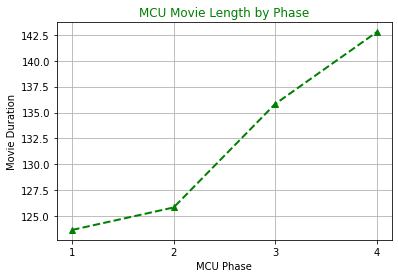

In [57]:

phase = data.groupby(['mcu_phase']).mean()
# plt.figure(figsize=(12,6))
plt.plot(phase['movie_duration'], '^--', c='g', lw=2)
plt.xticks(np.arange(1, 5, step=1))
plt.xlabel('MCU Phase')
plt.ylabel('Movie Duration')
plt.title('MCU Movie Length by Phase', c='g')
plt.grid(True)
plt.savefig('mcu_line.jpg')
plt.show()

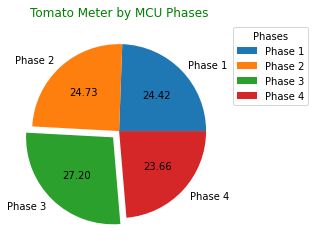

In [58]:
labels=['Phase 1','Phase 2','Phase 3','Phase 4']
explode=[0,0,.1,0]
phase = data.groupby(['mcu_phase']).mean()
# plt.figure(figsize=(12,6))
plt.pie(phase['tomato_meter'], labels=labels, autopct='%.2f', explode=explode)
plt.title('Tomato Meter by MCU Phases', c='g')
plt.grid(True)
plt.legend(title='Phases',labels=labels, bbox_to_anchor=[1, 1])
plt.savefig('mcu_pie.png')
plt.show()

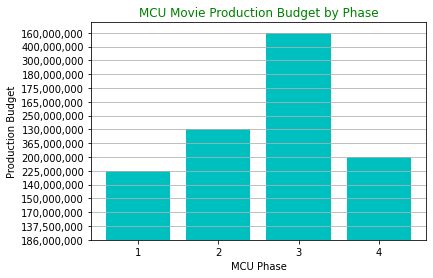

In [59]:
# plt.figure(figsize=(12,6))
plt.bar(data['mcu_phase'], data['production_budget'], color='c')
plt.xticks(np.arange(1, 5, step=1))
plt.xlabel('MCU Phase')
plt.ylabel('Production Budget')
plt.title('MCU Movie Production Budget by Phase', c='g')
plt.grid(axis='y')
plt.savefig('mcu_bar.jpg')
plt.show()

In [60]:
data.corr()

,mcu_phase,tomato_meter,audience_score,movie_duration
mcu_phase,1.000000,0.115278,0.290832,0.436997
tomato_meter,0.115278,1.000000,0.530359,0.135961
audience_score,0.290832,0.530359,1.000000,0.363841
movie_duration,0.436997,0.135961,0.363841,1.000000


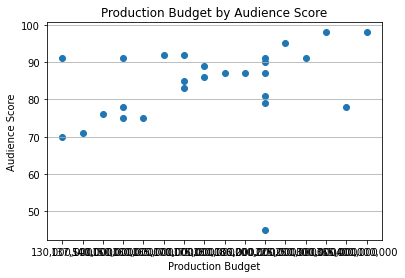

In [61]:
# plt.figure(figsize=(20,12))
plt.scatter(sorted(data['production_budget']),(data['audience_score']))
plt.xlabel('Production Budget')
plt.ylabel('Audience Score')
plt.grid(axis='y')
plt.title('Production Budget by Audience Score')
plt.savefig('mcu_scatter.png')
plt.show()

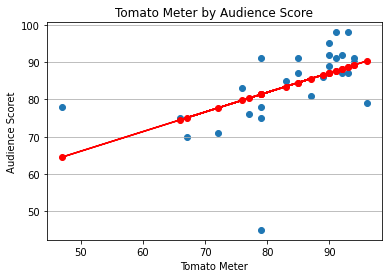

In [62]:
x = data['tomato_meter']
y = data['audience_score']

#calculate equation for trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# plt.figure(figsize=(20,12))
plt.scatter(x,y)
plt.xlabel('Tomato Meter')
plt.ylabel('Audience Scoret')
plt.grid(axis='y')
plt.title('Tomato Meter by Audience Score')
plt.plot(x, p(x), "r-o")
plt.show()



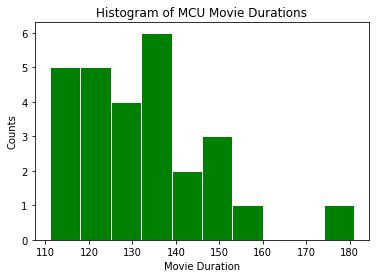

In [63]:

plt.hist(data['movie_duration'], color='g', edgecolor='w')
plt.ylabel('Counts')
plt.xlabel('Movie Duration')
plt.title('Histogram of MCU Movie Durations')
plt.savefig('mcu_hist.png')
plt.show()

In [64]:

# RangeIndex: 27 entries, 0 to 26
# Data columns (total 10 columns):
########int64(4),  
#  1   mcu_phase             27 non-null     int64
#  3   tomato_meter          27 non-null     int64 
#  4   audience_score        27 non-null     int64 
#  5   movie_duration        27 non-null     int64 

#########object(6)
#  0   movie_title           27 non-null     object
#  2   release_date          27 non-null     object
#  6   production_budget     27 non-null     object
#  7   opening_weekend       27 non-null     object
#  8   domestic_box_office   27 non-null     object
#  9   worldwide_box_office  27 non-null     object


In [65]:
data['production_budget'] = data['production_budget'].str.replace(",", "").astype(float)
data['opening_weekend'] = data['opening_weekend'].str.replace(",", "").astype(float)
data['domestic_box_office'] = data['domestic_box_office'].str.replace(",", "").astype(float)

In [66]:
data.corr()

,mcu_phase,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office
mcu_phase,1.000000,0.115278,0.290832,0.436997,0.164697,0.207150,0.221170
tomato_meter,0.115278,1.000000,0.530359,0.135961,0.129395,0.367428,0.482284
audience_score,0.290832,0.530359,1.000000,0.363841,0.211768,0.183380,0.242755
movie_duration,0.436997,0.135961,0.363841,1.000000,0.798259,0.769969,0.690246
production_budget,0.164697,0.129395,0.211768,0.798259,1.000000,0.819052,0.688485
opening_weekend,0.207150,0.367428,0.183380,0.769969,0.819052,1.000000,0.955359
domestic_box_office,0.221170,0.482284,0.242755,0.690246,0.688485,0.955359,1.000000


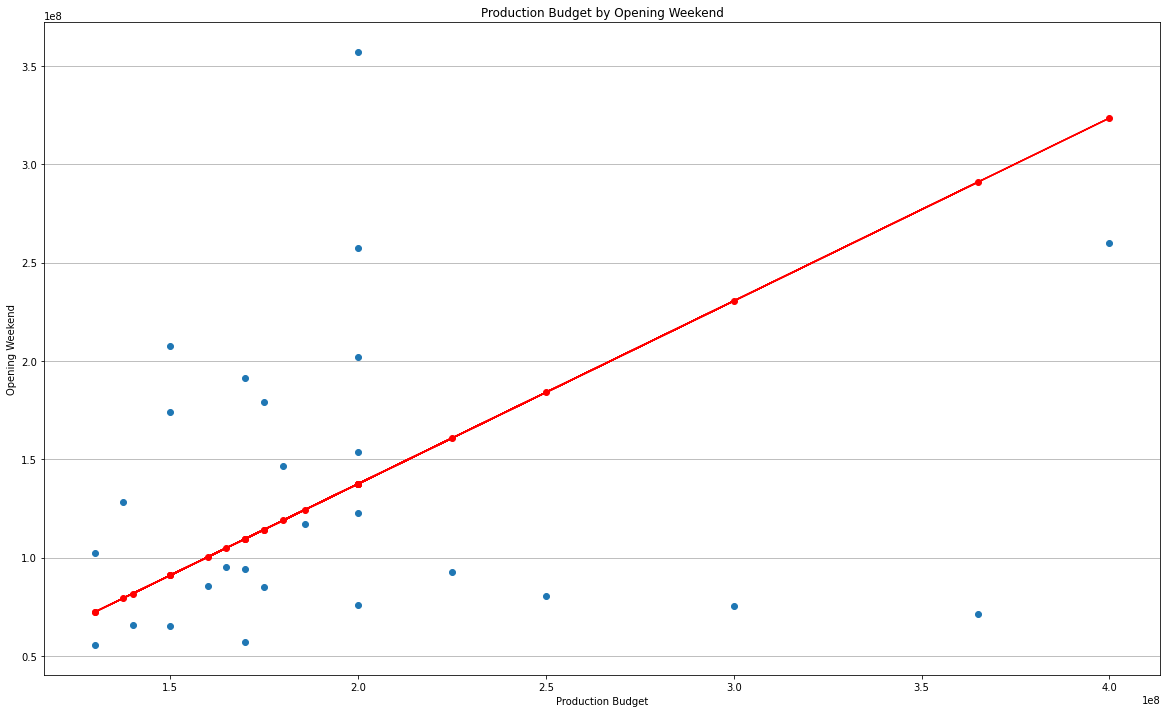

In [67]:
x=data['production_budget']
y=data['opening_weekend']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.figure(figsize=(20,12))
plt.scatter(sorted(x),(y))
plt.xlabel('Production Budget')
plt.ylabel('Opening Weekend')
plt.grid(axis='y')
plt.title('Production Budget by Opening Weekend')
plt.plot(x, p(x), "r-o")
plt.show()



